In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned data
data = pd.read_csv(r'C:\Users\tanzi\Personal Projects\sports-data-pipeline\data\cleaned\ipl_cleaned.csv')


In [4]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0


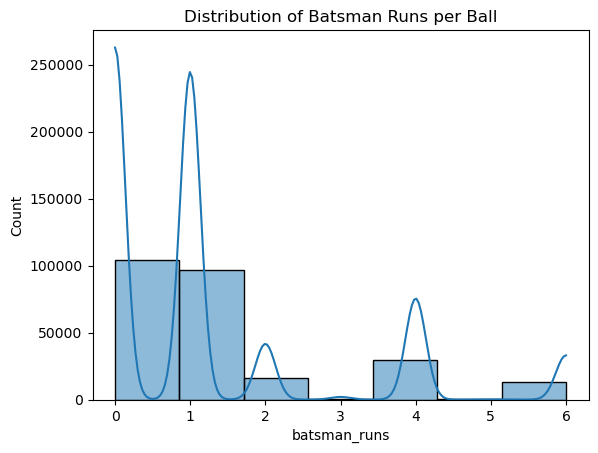

In [10]:
sns.histplot(data['batsman_runs'], bins=7, kde=True)
plt.title("Distribution of Batsman Runs per Ball")
plt.show()

In [12]:
# Top Run Scorers
data.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

C:\Users\tanzi\AppData\Local\Temp\ipykernel_23284\3413506485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis')


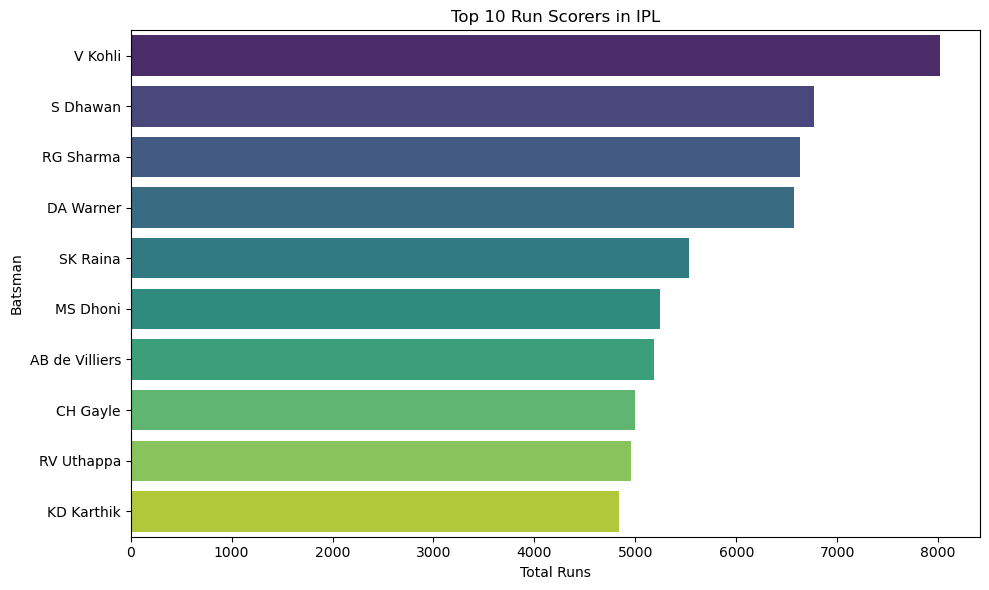

In [28]:
#Top 10 Run Scorers
top_batsmen = data.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()

C:\Users\tanzi\AppData\Local\Temp\ipykernel_23284\2095697243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.index, y=team_runs.values, palette='coolwarm')


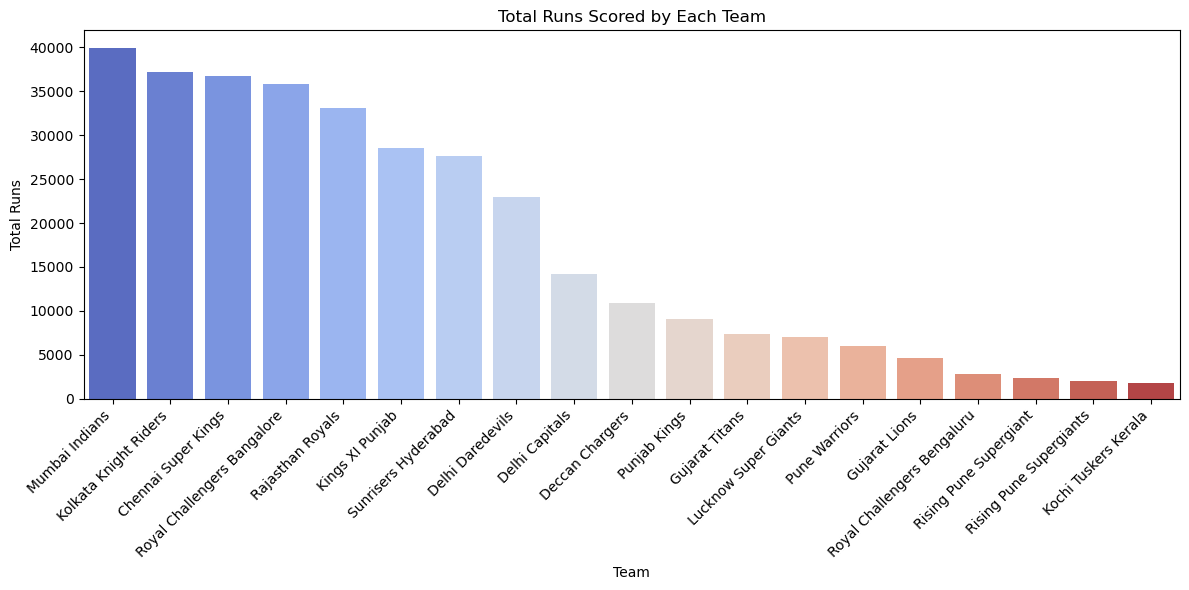

In [30]:
# Total Runs by Team
team_runs = data.groupby('batting_team')['batsman_runs'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.index, y=team_runs.values, palette='coolwarm')
plt.title('Total Runs Scored by Each Team')
plt.ylabel('Total Runs')
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Top Bowlers (Most Wickets)

data[data['is_wicket'] == 1].groupby('bowler').size().sort_values(ascending=False).head(10)

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
dtype: int64

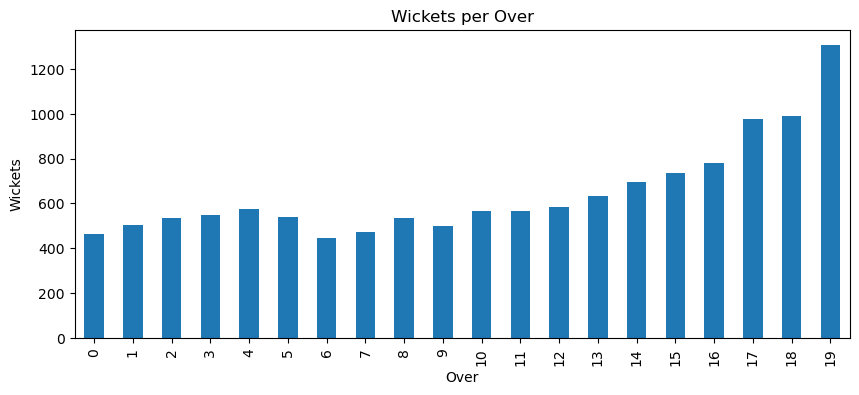

In [16]:
# Wickets per Over

data.groupby('over')['is_wicket'].sum().plot(kind='bar', figsize=(10, 4), title='Wickets per Over')
plt.xlabel("Over")
plt.ylabel("Wickets")
plt.show()

In [20]:
# How expensive is a bowler?

bowler_stats = data.groupby('bowler').agg(
    runs_conceded=('total_runs', 'sum'),
    balls=('ball', 'count')
)
bowler_stats['overs'] = bowler_stats['balls'] // 6 + (bowler_stats['balls'] % 6) / 6
bowler_stats['economy'] = bowler_stats['runs_conceded'] / bowler_stats['overs']
bowler_stats.sort_values('economy').head(10)


,runs_conceded,balls,overs,economy
bowler,,,,
AC Gilchrist,0,1,0.166667,0.000000
R Ravindra,7,12,2.000000,3.500000
NB Singh,18,25,4.166667,4.320000
Sachin Baby,8,10,1.666667,4.800000
AM Rahane,5,6,1.000000,5.000000
LA Carseldine,6,7,1.166667,5.142857
SS Mundhe,6,7,1.166667,5.142857
DJ Thornely,40,44,7.333333,5.454545
M Manhas,42,42,7.000000,6.000000


In [24]:
# Most explosive batsmen by strike rate

batting_stats = data.groupby('batter').agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count')
)
batting_stats['strike_rate'] = batting_stats['runs'] / batting_stats['balls'] * 100
batting_stats.sort_values('strike_rate', ascending=False).head(10)


,runs,balls,strike_rate
batter,,,
L Wood,9,3,300.000000
B Stanlake,5,2,250.000000
J Fraser-McGurk,330,150,220.000000
R Sai Kishore,13,6,216.666667
Umar Gul,39,19,205.263158
RS Sodhi,4,2,200.000000
Shahid Afridi,81,46,176.086957
I Malhotra,7,4,175.000000
WG Jacks,230,133,172.932331


C:\Users\tanzi\AppData\Local\Temp\ipykernel_23284\2239909812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='batsman_runs', palette='pastel')


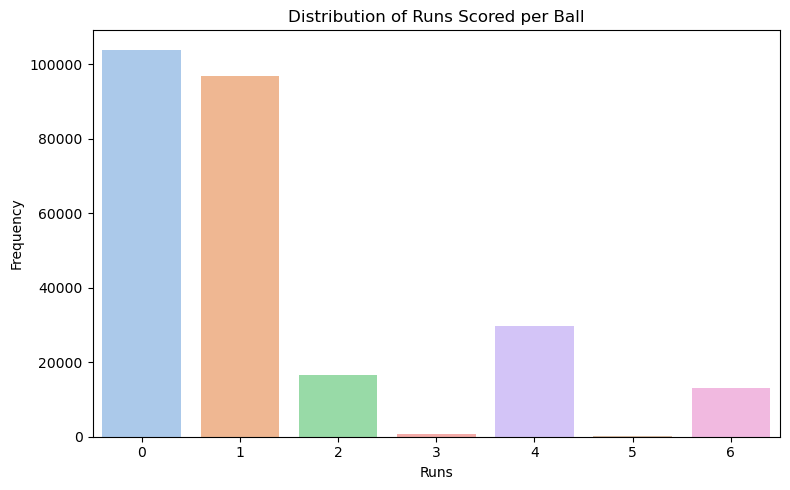

In [32]:
# Distribution of Runs Scored per Ball

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='batsman_runs', palette='pastel')
plt.title('Distribution of Runs Scored per Ball')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

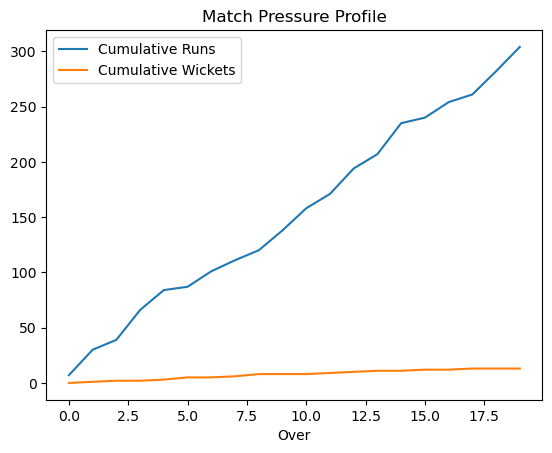

In [36]:
# Tells us how the match builds up interms of runs.

match = data[data['match_id'] == data['match_id'].unique()[0]]
match_summary = match.groupby('over').agg({'total_runs': 'sum', 'is_wicket': 'sum'}).cumsum()

plt.plot(match_summary['total_runs'], label='Cumulative Runs')
plt.plot(match_summary['is_wicket'], label='Cumulative Wickets')
plt.legend()
plt.title("Match Pressure Profile")
plt.xlabel("Over")
plt.show()


In [42]:
# Over-by-Over Economy: Top 5 Bowlers
top_bowlers = data['bowler'].value_counts().head(5).index
eco_data = data[data['bowler'].isin(top_bowlers)]
economy_summary = eco_data.groupby(['bowler', 'over'])['total_runs'].mean().unstack().fillna(0)
print("\n8. Over-by-Over Economy (Top 5 Bowlers):\n", economy_summary.round(2))


8. Over-by-Over Economy (Top 5 Bowlers):
 over         0     1     2     3     4     5     6     7     8     9     10  \
bowler                                                                        
B Kumar    0.85  0.95  1.20  1.25  1.09  1.41  0.68  1.00  1.30  1.28  1.50   
PP Chawla  0.76  1.28  1.55  1.62  1.11  1.36  1.18  1.25  1.15  1.34  1.42   
R Ashwin   0.91  1.13  1.18  1.15  1.08  1.20  0.92  1.14  1.08  1.11  1.14   
RA Jadeja  1.00  1.00  1.17  1.03  1.54  1.71  1.16  1.21  1.25  1.10  1.23   
SP Narine  1.76  1.14  1.37  1.22  1.07  1.07  0.97  1.07  0.90  1.14  1.08   

over         11    12    13    14    15    16    17    18    19  
bowler                                                           
B Kumar    1.43  1.39  1.27  1.57  1.26  1.41  1.52  1.48  1.75  
PP Chawla  1.35  1.15  1.56  1.55  1.18  1.50  1.36  2.25  2.13  
R Ashwin   1.21  1.24  1.22  1.27  1.17  1.34  1.34  1.50  2.30  
RA Jadeja  1.17  1.21  1.33  1.40  1.36  1.38  1.53  0.81  2.38  
SP Nari

In [44]:
# Team Collapse Detection: 3+ wickets in 3 overs
collapse_matches = []
for match_id in data['match_id'].unique():
    match = data[data['match_id'] == match_id]
    for over in range(1, 18):
        window = match[(match['over'] >= over) & (match['over'] < over + 3)]
        if window['is_wicket'].sum() >= 3:
            collapse_matches.append(match_id)
            break
print("Matches with Collapse (3+ wickets in 3 overs):\n", collapse_matches[:10])

Matches with Collapse (3+ wickets in 3 overs):
 [335982, 335983, 335984, 335985, 335986, 335987, 335989, 335990, 335991, 335993]


In [ ]:
# Done with EDA